In [221]:
import os
os.chdir('/Users/joepalmo/Desktop/THESIS/errorprop')
import accretion as a
import accretion_objects as objects
from importlib import reload
reload(a)
reload(objects)

<module 'accretion_objects' from '/Users/joepalmo/Desktop/THESIS/errorprop/accretion_objects.py'>

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb
from astropy import constants as const
import random
import astropy.constants as const
import math
from tqdm import tqdm
import extinction as ex
import pdb
import glob
import scipy.optimize as optimization
from matplotlib.animation import FuncAnimation

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
pyo.init_notebook_mode(connected=True)

In [287]:
observed1 = pd.read_csv('accdb_updated.csv')
observed1['Upper Limit'] = observed1['Upper Limit'].fillna('No')
nolimit = observed1[observed1['Upper Limit']=='No']

In [288]:
n = objects.AccretionDistribution(nolimit)
n.bootstrap()
n.UVExcessErrorProp(0, 0, 0, 0, 3, 0, 0, 1, variability=0, age_scatter=False)
df = n.create_df()

In [289]:
#df

In [290]:
def build_figure(observed,df):
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df["Mass (M$_\odot$)"],
        y=df["Mdot (M$_\odot$)"],
        mode='markers',
        name="Simulated",
        opacity=0.7,
        marker=dict(
        color='salmon'),
    ))


    fig.add_trace(go.Scatter(
        x=observed["Object Mass M_Solar"],
        y=observed["Accretion Rate M_solar yr-1"], 
        mode='markers',
        name='Observed',
        opacity=0.6,
        marker=dict(
        symbol='x',
        color='#44749D'),
    ))

    fig.add_trace(go.Scatter(
        x=observed["Object Mass M_Solar"],
        y=a.empiricalMdot(observed["Object Mass M_Solar"]), 
        mode='lines',
        name='Empirical Relationship',
        opacity=0.9,
        marker=dict(
        color='gray'),
    ))

    fig.update_layout(
        width=1200,
        height=675,
        
        title={
        'text': "Accretion Monte Carlo Error Propagation",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top',
        },

        xaxis_title="Mass (solar masses)",
        yaxis_title="Mass Accretion Rate (solar masses/yr)",
        legend_title=None,

        font=dict(
        ),

        xaxis = dict(
            tickmode = 'array',
            tickvals = [0, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2],
            showgrid = False
        ),

        yaxis = dict(
            showexponent='all',
            tickmode = 'array',
            tickvals = [1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6],
            ticktext = [1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6],
            showgrid = True
        ),
    )
    fig.update_xaxes(type="log")
    fig.update_yaxes(type="log")
    
    return fig

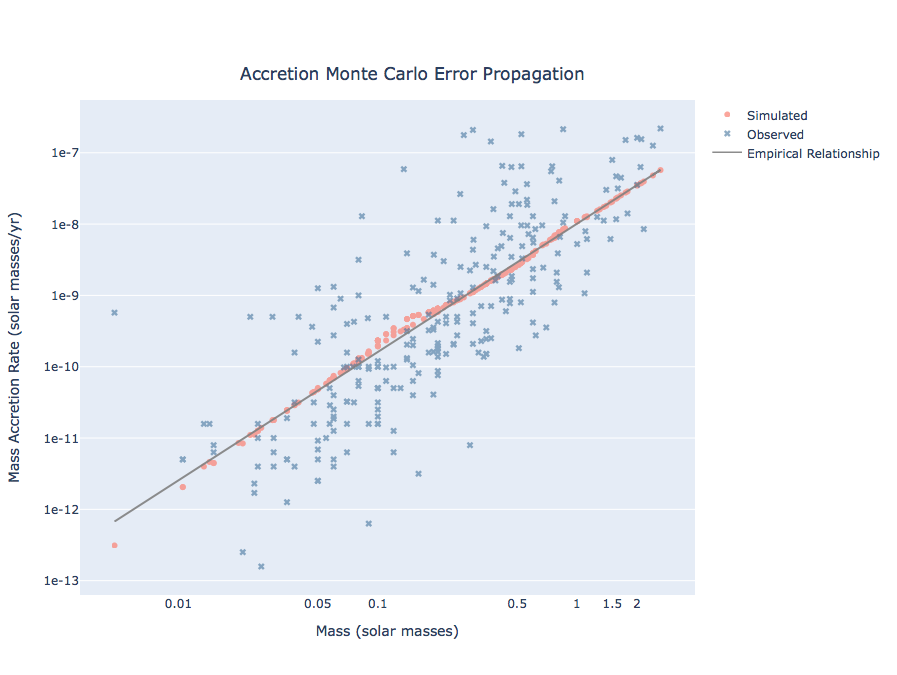

In [291]:
fig = build_figure(n.observed,df)
fig

In [292]:
def build_residuals(observed, df):
    
    residual_fig = go.Figure()
    
    observed_difference = np.log10(observed['Accretion Rate M_solar yr-1']) - np.log10(a.empiricalMdot(observed['Object Mass M_Solar']))
    simulated_difference = np.log10(df['Mdot (M$_\\odot$)']) - np.log10(a.empiricalMdot(df['Mass (M$_\\odot$)']))
    
    residual_fig.add_trace(go.Scatter(
        x=df["Mass (M$_\odot$)"],
        y=simulated_difference,
        mode='markers',
        name="Simulated",
        opacity=0.7,
        marker=dict(
        color='salmon'),
    ))


    residual_fig.add_trace(go.Scatter(
        x=observed["Object Mass M_Solar"],
        y=observed_difference, 
        mode='markers',
        name='Observed',
        opacity=0.6,
        marker=dict(
        symbol='x',
        color='#44749D'),
    ))

    residual_fig.add_trace(go.Scatter(
        x=observed["Object Mass M_Solar"],
        y=np.zeros(len(observed["Object Mass M_Solar"])), 
        mode='lines',
        name='Empirical Relationship',
        opacity=0.9,
        marker=dict(
        color='gray'),
    ))

    residual_fig.update_layout(
        width=1200,
        height=400,
        
        title={
        'text': "Residuals",
        'y':0.9,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top',
        },

        xaxis_title="Mass (solar masses)",
        yaxis_title="Residual (log space)",
        legend_title=None,

        font=dict(
        ),

        xaxis = dict(
            tickmode = 'array',
            tickvals = [0, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2],
            showgrid = False
        ),

        yaxis = dict(
            showexponent='all',
            tickmode = 'array',
            tickvals = [-3, -2, -1, 0, 1, 2, 3],
            showgrid = True
        ),
    )
    residual_fig.update_xaxes(type="log")
    
    return residual_fig

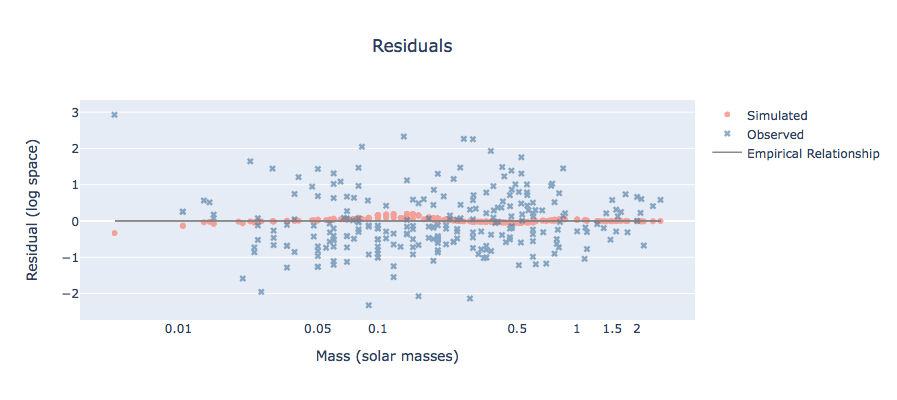

In [293]:
residual_fig = build_residuals(n.observed, df)
residual_fig

In [108]:
# current accretion distribution object: n


In [294]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

#create app
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

#Layout app using HTML
app.layout = html.Div(children=[
    html.Center(children=[
    html.H2(children='Simulated Scatter: Computational Modeling of (Sub)Stellar Accretion Rates'),

    html.Div(children='''
        Joe Palmo
    '''),
    ]),
    
    # Dropdown to choose whether user wants age scatter or not
    html.Div([
            #Dropdown menu to choose whether user wants Age Scatter
            html.Center(children=[
            html.H5("Age Scatter"),
            dcc.Dropdown(
                id='age_scatter',
                options=[{'label': i, 'value': i} for i in ['Age Scatter On', 'Age Scatter Off']],
                value='Age Scatter Off'
            ),
            #Input for spec type uncertainty
            html.H5("Spectral Type Uncertainty (subclasses)"),
            dcc.Input(
                id='SpTy_uncertainty',
                type='number',
                value=0.0
            ),
        
            #Input for distance uncertainty
            html.H5("Distance Uncertainty (pc)"),
            dcc.Input(
                id='distance_uncertainty',
                type='number',
                value=0
            ),
        
            #Input for age uncertainty
            html.H5("Age Uncertainty (Myr)"),
            dcc.Input(
                id='age_uncertainty',
                type='number',
                value=0.0
            ),
        
            #Input for Av uncertainty
            html.H5("Av Uncertainty (mag)"),
            dcc.Input(
                id='Av_uncertainty',
                type='number',
                value=0.0
            ),
            
            #Input for bc uncertainty
            html.H5("Bolometric Correction Uncertainty (scale factor)"),
            dcc.Input(
                id='bc_uncertainty',
                type='number',
                value=0.0
            ),
                
            #Input for UV Excess uncertainty
            html.H5("UV Excess Uncertainty (% error (as decimal))"),
            dcc.Input(
                id='observable_uncertainty',
                type='number',
                value=0.0
            ),
            ])
    ],
        style={'width': '48%', 'display': 'inline-block'}),

    dcc.Graph(
        id='MC',
        figure=fig
    ),
    
    html.Div(
        dcc.Graph(
        id='residual',
        figure=residual_fig
    ),
    ),
])

###### NEXT STEP #######
#Update Figure with the age_scatter input
@app.callback(
    Output('MC', 'figure'),
    Input('age_scatter', 'value'),
    Input('SpTy_uncertainty', 'value'),
    Input('distance_uncertainty', 'value'),
    Input('age_uncertainty', 'value'),
    Input('Av_uncertainty', 'value'),
    Input('bc_uncertainty', 'value'),
    Input('observable_uncertainty', 'value'),)
def update_figure(age_scatter, SpTy_uncertainty, distance_uncertainty, age_uncertainty, Av_uncertainty,
                  bc_uncertainty, observable_uncertainty):
    
    #n = objects.AccretionDistribution(nolimit)
    #n.bootstrap()
    
    if age_scatter == 'Age Scatter On':
        n.UVExcessErrorProp(SpTy_uncertainty, distance_uncertainty, age_uncertainty, Av_uncertainty, 3, bc_uncertainty, observable_uncertainty, 1, variability=0, age_scatter=True)
    else:
        n.UVExcessErrorProp(SpTy_uncertainty, distance_uncertainty, age_uncertainty, Av_uncertainty, 3, bc_uncertainty, observable_uncertainty, 1, variability=0, age_scatter=False)
        
    df = n.create_df()
    
    fig = build_figure(n.observed, df)
    
    residual_fig = build_residuals(n.observed, df)
    
    fig.update_layout(transition_duration=500)

    return fig

@app.callback(
    Output('residual', 'figure'),
    Input('age_scatter', 'value'),
    Input('SpTy_uncertainty', 'value'),
    Input('distance_uncertainty', 'value'),
    Input('age_uncertainty', 'value'),
    Input('Av_uncertainty', 'value'),
    Input('bc_uncertainty', 'value'),
    Input('observable_uncertainty', 'value'),)
def update_residuals(age_scatter, SpTy_uncertainty, distance_uncertainty, age_uncertainty, Av_uncertainty,
                  bc_uncertainty, observable_uncertainty):
    
    #n = objects.AccretionDistribution(nolimit)
    #n.bootstrap()
    
    if age_scatter == 'Age Scatter On':
        n.UVExcessErrorProp(SpTy_uncertainty, distance_uncertainty, age_uncertainty, Av_uncertainty, 3, bc_uncertainty, observable_uncertainty, 1, variability=0, age_scatter=True)
    else:
        n.UVExcessErrorProp(SpTy_uncertainty, distance_uncertainty, age_uncertainty, Av_uncertainty, 3, bc_uncertainty, observable_uncertainty, 1, variability=0, age_scatter=False)
        
    df = n.create_df()
    
    residual_fig = build_residuals(n.observed, df)
    
    residual_fig.update_layout(transition_duration=500)

    return residual_fig

if __name__ == '__main__':
    app.run_server(debug=False)
    


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", l

ERROR:__main__:Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/Users/joepalmo/an

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/Users/joepalmo/anaconda3/lib/pyt

ERROR:__main__:Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/joepalmo/anaconda3/lib/python3.6/site-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "/Users/joepalmo/an